Loading the data processed by hdWGCNA in R

In [1]:
import math
import seaborn as sns
import numpy as np
import scanpy as sc
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [2]:
expr_path = "/data/scRNA/ABCA/AIBS/AWS/expression_matrices/WMB-10Xv3/20230630/processed/WMB-10Xv3-Isocortex-1-log2-wmeta.h5ad"
adata = sc.read_h5ad(expr_path)
adata

AnnData object with n_obs × n_vars = 227670 × 32285
    obs: 'cell_barcode', 'barcoded_cell_sample_label', 'library_label', 'feature_matrix_label', 'entity', 'brain_section_label', 'library_method', 'region_of_interest_acronym', 'donor_label', 'donor_genotype', 'donor_sex', 'dataset_label', 'x', 'y', 'cluster_alias', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color', 'region_of_interest_order', 'region_of_interest_color'
    var: 'gene_symbol'

In [3]:
MEs_df = pd.read_csv("/data/scRNA/ABCA/AIBS/AWS/expression_matrices/WMB-10Xv3/20230630/outputs/WMB-10Xv3-Isocortex-1-raw-sc-wgcna-MEs.csv",\
    index_col = "Unnamed: 0")
merged_df = pd.merge(adata.obs, MEs_df, left_index=True, right_index=True)
merged_df.head()

,cell_barcode,barcoded_cell_sample_label,library_label,feature_matrix_label,entity,brain_section_label,library_method,region_of_interest_acronym,donor_label,donor_genotype,...,cluster_color,region_of_interest_order,region_of_interest_color,red,grey,brown,green,yellow,blue,turquoise
GCACTAAGTACAAGTA-399_B02,GCACTAAGTACAAGTA,399_B02,L8TX_201022_01_H06,WMB-10Xv3-Isocortex-1,cell,NaN,10Xv3,RSP,Snap25-IRES2-Cre;Ai14-546810,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,#99CFFF,11,#E4FF26,2.282904,-3.898073,-1.432982,-1.215674,-1.684904,-0.996934,-1.233609
CAGAGCCGTCCTGGTG-399_A02,CAGAGCCGTCCTGGTG,399_A02,L8TX_201023_01_A09,WMB-10Xv3-Isocortex-1,cell,NaN,10Xv3,RSP,Snap25-IRES2-Cre;Ai14-546810,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,#99CFFF,11,#E4FF26,0.992533,-3.121295,-2.115144,-1.487519,-2.421010,-1.585907,-1.742853
CGCCATTCACGACAGA-403_A06,CGCCATTCACGACAGA,403_A06,L8TX_201022_01_B07,WMB-10Xv3-Isocortex-1,cell,NaN,10Xv3,RSP,Snap25-IRES2-Cre;Ai14-547057,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,#99CFFF,11,#E4FF26,-0.004657,-2.678370,0.600478,-1.595254,-2.748975,-1.369193,-1.301950
GGGTTTATCCGATCGG-399_B02,GGGTTTATCCGATCGG,399_B02,L8TX_201022_01_H06,WMB-10Xv3-Isocortex-1,cell,NaN,10Xv3,RSP,Snap25-IRES2-Cre;Ai14-546810,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,#99CFFF,11,#E4FF26,0.410451,-2.845025,-1.586820,-1.076665,-2.731434,-0.919426,-1.315890
GTGTGATCAGACAAAT-399_B02,GTGTGATCAGACAAAT,399_B02,L8TX_201022_01_H06,WMB-10Xv3-Isocortex-1,cell,NaN,10Xv3,RSP,Snap25-IRES2-Cre;Ai14-546810,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,#99CFFF,11,#E4FF26,0.065757,-3.417095,-2.337744,-0.911918,-2.725567,-1.032324,-0.913766


## Module Eigengene activation in UMAP

In [4]:
def plot_umap(data, x_col="x", y_col="y", color_col="turquoise", fig_width=10, fig_height=8, cmap="viridis"):
    """
    Plots a UMAP visualization with a style similar to a minimal scatter plot.

    Parameters:
        data (pd.DataFrame): The dataframe containing UMAP coordinates and the column to color.
        x_col (str): Column name for the x-axis UMAP coordinate.
        y_col (str): Column name for the y-axis UMAP coordinate.
        color_col (str): Column name for the color values.
        fig_width (float): Width of the figure.
        fig_height (float): Height of the figure.
        cmap (str): Colormap for the scatter plot.

    Returns:
        fig, ax: Matplotlib figure and axis objects.
    """
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)

    # Scatter plot with small marker size
    scatter = ax.scatter(
        data[x_col],
        data[y_col],
        s=0.5,
        c=data[color_col],
        cmap=cmap,
        marker='.',
        edgecolor='none'
    )

    # Set equal axis aspect ratio
    ax.axis('equal')

    # Set limits for the plot
    ax.set_xlim(-18, 27)
    ax.set_ylim(-18, 27)

    # Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Add a colorbar
    fig.colorbar(scatter, ax=ax, orientation='vertical', label=color_col)

    return fig, ax

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


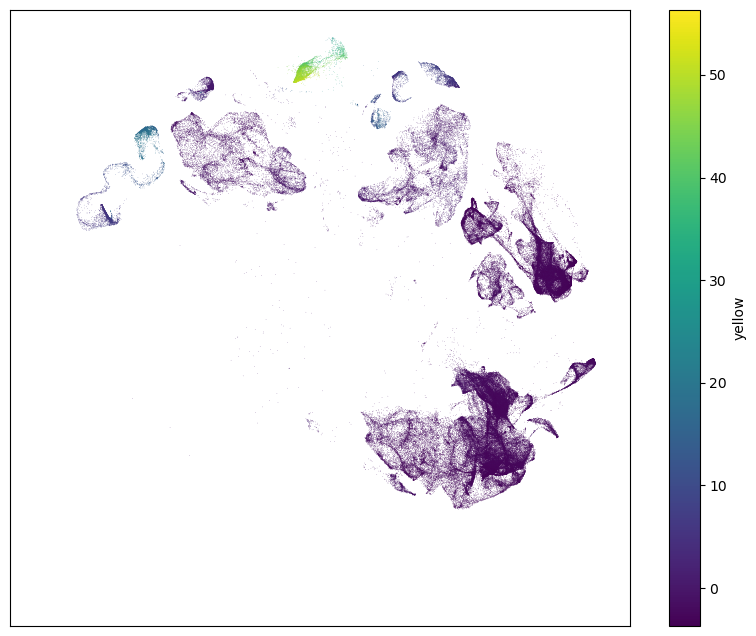

In [5]:
plot_umap(merged_df, color_col="yellow")

In [6]:
def plot_multiumap(data, x_col="x", y_col="y", start_col="region_of_interest_color", fig_width=8, fig_height=8, cmap="viridis"):
    """
    Plots UMAP visualizations for all columns after a specified starting column in a single figure with subplots.

    Parameters:
        data (pd.DataFrame): The dataframe containing UMAP coordinates and the columns to color.
        x_col (str): Column name for the x-axis UMAP coordinate.
        y_col (str): Column name for the y-axis UMAP coordinate.
        start_col (str): Column name to start plotting from (inclusive).
        fig_width (float): Width of the entire figure.
        fig_height (float): Height of the entire figure.
        cmap (str): Colormap for the scatter plots.

    Returns:
        None
    """
    start_index = data.columns.get_loc(start_col)
    color_columns = data.columns[start_index:]

    # Calculate the number of rows and columns for subplots
    n_cols = 4
    n_rows = math.ceil(len(color_columns) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width * n_cols / 4, fig_height * n_rows / 4))
    axes = axes.flatten()

    for i, color_col in enumerate(color_columns):
        ax = axes[i]

        # Ensure the column has numeric values for color mapping
        if data[color_col].dtype.kind in 'iufc':  # Check for numeric types
            scatter = ax.scatter(
                data[x_col],
                data[y_col],
                s=0.5,
                c=data[color_col],
                cmap=cmap,
                marker='.',
                edgecolor='none'
            )

            # Add a colorbar
            cbar = fig.colorbar(scatter, ax=ax, orientation='vertical')
            cbar.ax.tick_params(labelsize=6)
        else:
            scatter = ax.scatter(
                data[x_col],
                data[y_col],
                s=0.5,
                color='grey',
                marker='.',
                edgecolor='none'
            )

        # Adjust axis aspect ratio
        ax.set_aspect('auto')

        # Remove axis ticks
        ax.set_xticks([])
        ax.set_yticks([])

        # Set title
        ax.set_title(color_col, fontsize=8)

    # Turn off unused subplots
    for ax in axes[len(color_columns):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

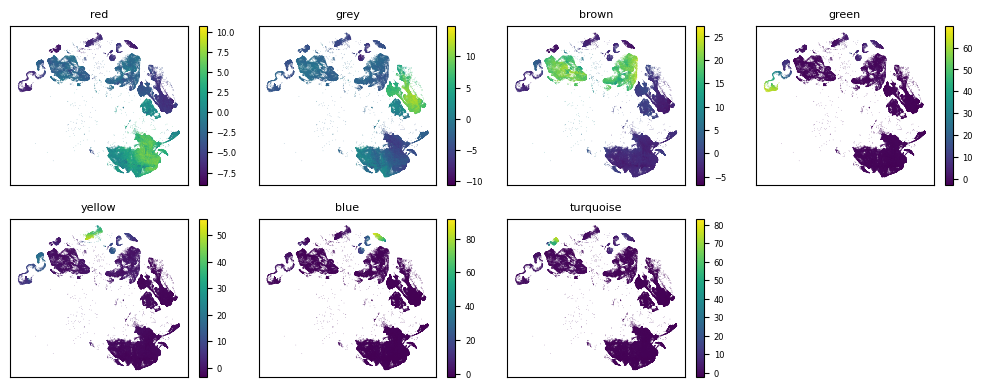

In [8]:
plot_multiumap(merged_df, start_col="red", fig_width=10, fig_height=8)

## Histogram of Module Eigengene values

In [9]:
# Histogram of MEs
def plot_histogram(merged_df, modules):
    # Set up subplots
    n_cols = 4  # Adjust based on how many columns you want
    n_rows = int(np.ceil(len(modules) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3*n_rows))
    axes = axes.flatten()  # Flatten for easy iteration

    # Plot histograms for each module
    for i, module in enumerate(modules):
        ax = axes[i]
        sns.histplot(
            data=merged_df,
            x=module,
            kde=True,
            ax=ax,
            color='#1f77b4',
            stat='density',
            edgecolor='none'
        )
        # Add vertical line for median
        median_val = merged_df[module].median()
        ax.axvline(median_val, color='red', linestyle='--', linewidth=1.5, label=f'Median = {median_val:.2f}')
        ax.set_title(f'{module} Module', fontsize=12)
        ax.set_xlabel('Normalized Eigengene Value', fontsize=10)
        ax.set_ylabel('Density', fontsize=10)
        ax.legend(loc='upper right', fontsize=8)

    # Remove empty subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

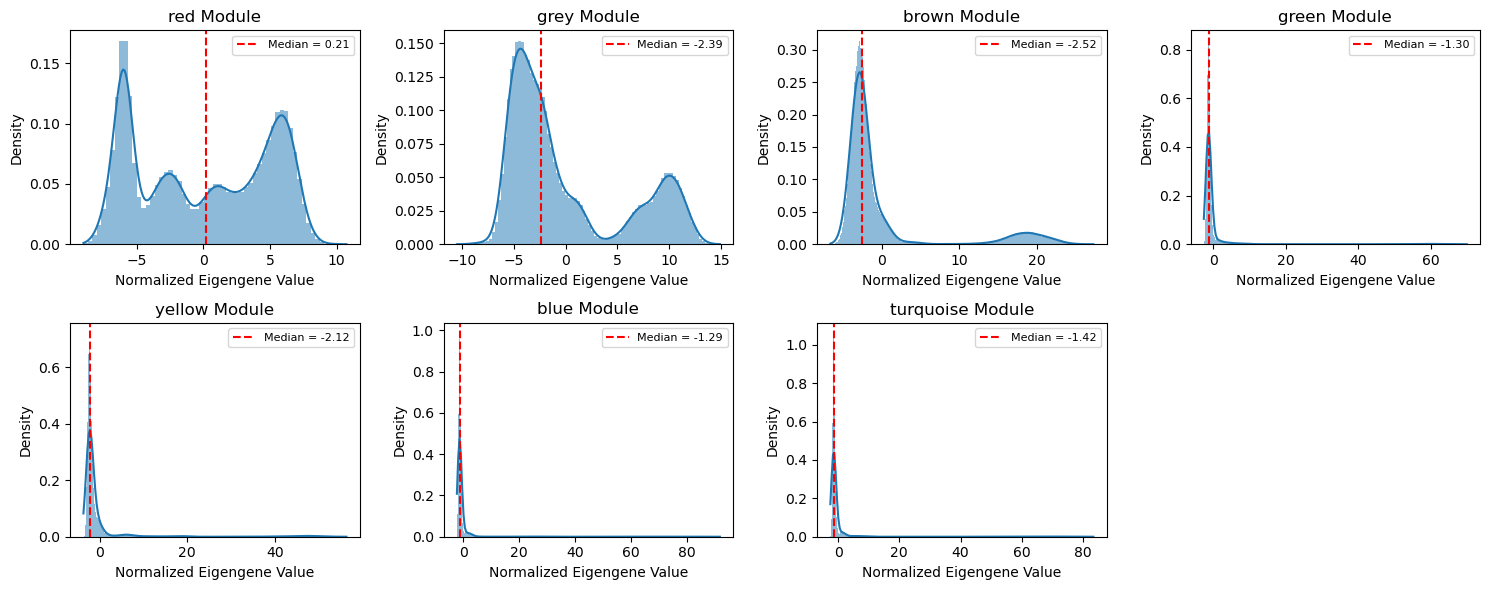

In [11]:
modules = merged_df.columns[merged_df.columns.get_loc("red"):].tolist()
plot_histogram(merged_df, modules)

**For normalized values**

In [13]:
# Scaling MEs
from sklearn.preprocessing import StandardScaler

# Extract module columns (adjust names as needed)
modules = merged_df.columns[merged_df.columns.get_loc("red"):]

# Normalize modules
scaler = StandardScaler()
merged_df[modules] = scaler.fit_transform(merged_df[modules])
merged_df.head()
# Now compare across cell types (e.g., group by 'class' and analyze)

,cell_barcode,barcoded_cell_sample_label,library_label,feature_matrix_label,entity,brain_section_label,library_method,region_of_interest_acronym,donor_label,donor_genotype,...,cluster_color,region_of_interest_order,region_of_interest_color,red,grey,brown,green,yellow,blue,turquoise
GCACTAAGTACAAGTA-399_B02,GCACTAAGTACAAGTA,399_B02,L8TX_201022_01_H06,WMB-10Xv3-Isocortex-1,cell,NaN,10Xv3,RSP,Snap25-IRES2-Cre;Ai14-546810,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,#99CFFF,11,#E4FF26,0.458000,-0.682504,-0.203962,-0.161106,-0.201602,-0.119291,-0.141578
CAGAGCCGTCCTGGTG-399_A02,CAGAGCCGTCCTGGTG,399_A02,L8TX_201023_01_A09,WMB-10Xv3-Isocortex-1,cell,NaN,10Xv3,RSP,Snap25-IRES2-Cre;Ai14-546810,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,#99CFFF,11,#E4FF26,0.199132,-0.546969,-0.301387,-0.197967,-0.290227,-0.195780,-0.202748
CGCCATTCACGACAGA-403_A06,CGCCATTCACGACAGA,403_A06,L8TX_201022_01_B07,WMB-10Xv3-Isocortex-1,cell,NaN,10Xv3,RSP,Snap25-IRES2-Cre;Ai14-547057,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,#99CFFF,11,#E4FF26,-0.000920,-0.469685,0.086452,-0.212575,-0.329714,-0.167636,-0.149787
GGGTTTATCCGATCGG-399_B02,GGGTTTATCCGATCGG,399_B02,L8TX_201022_01_H06,WMB-10Xv3-Isocortex-1,cell,NaN,10Xv3,RSP,Snap25-IRES2-Cre;Ai14-546810,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,#99CFFF,11,#E4FF26,0.082357,-0.498764,-0.225933,-0.142256,-0.327602,-0.109226,-0.151461
GTGTGATCAGACAAAT-399_B02,GTGTGATCAGACAAAT,399_B02,L8TX_201022_01_H06,WMB-10Xv3-Isocortex-1,cell,NaN,10Xv3,RSP,Snap25-IRES2-Cre;Ai14-546810,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,#99CFFF,11,#E4FF26,0.013206,-0.598581,-0.333178,-0.119917,-0.326895,-0.123888,-0.103158


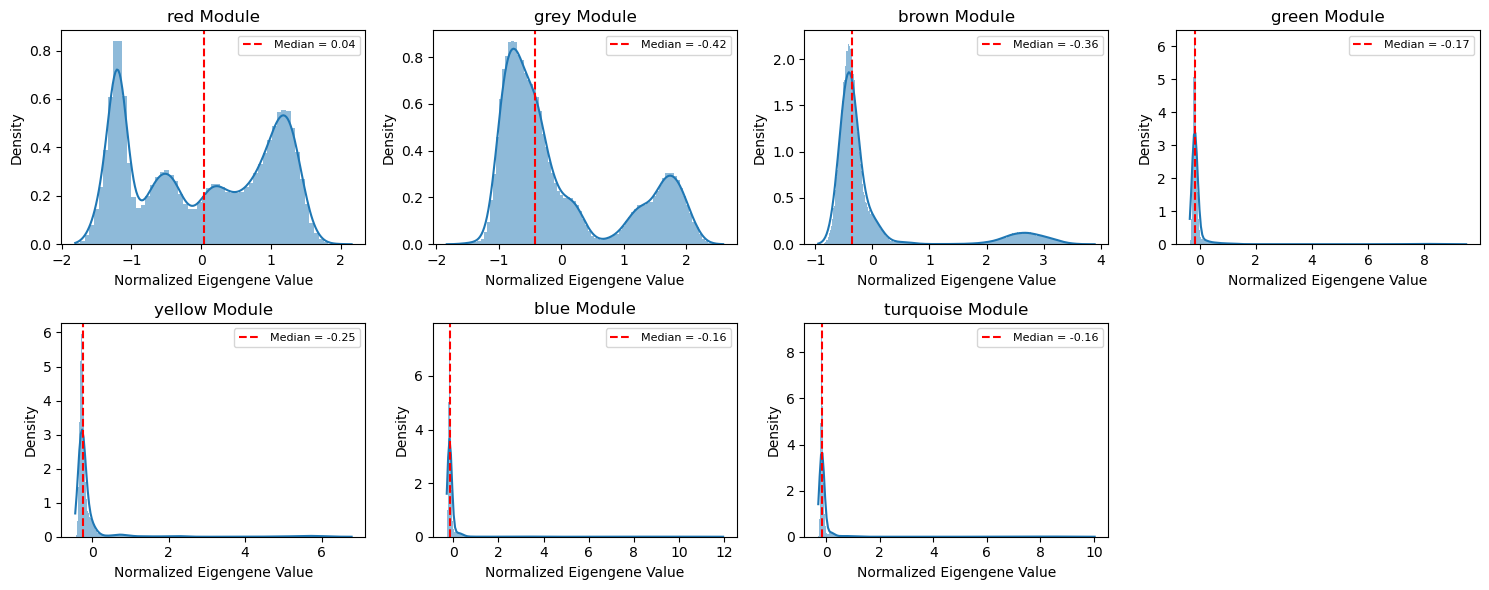

In [14]:
modules = merged_df.columns[merged_df.columns.get_loc("red"):].tolist()
plot_histogram(merged_df, modules)

## Module Eigengenes across cell classes

In [15]:
# Convert to AnnData (required for scanpy plotting)
adata_vis = sc.AnnData(merged_df[modules])
adata_vis.obs["class"] = merged_df["class"]  # Add cell type labels

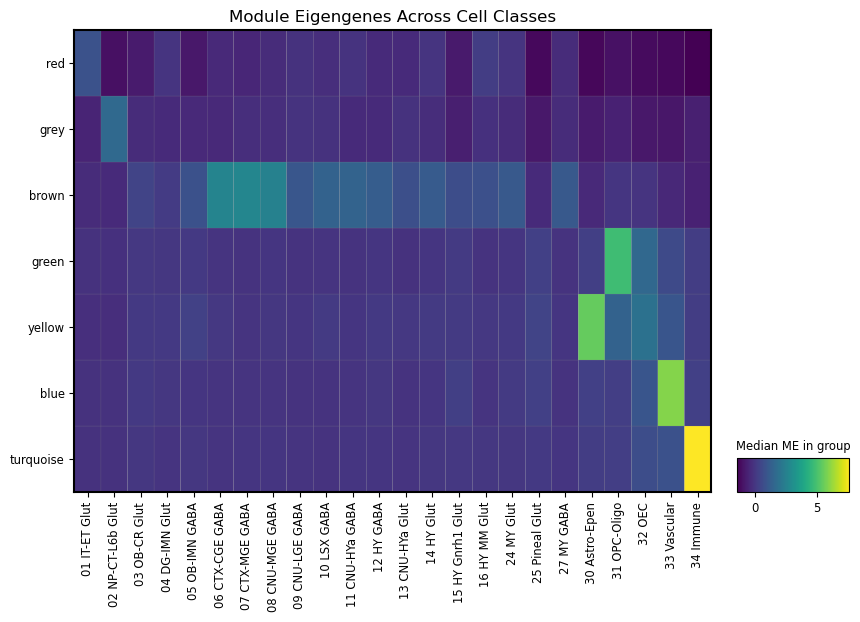

In [16]:
# Matrixplot
sc.pl.matrixplot(
    adata_vis,
    var_names=modules,
    groupby="class",
    swap_axes=True,  # Show modules on y-axis, cell types on x-axis
    figsize=(10, 6),  # Adjust size as needed
    title="Module Eigengenes Across Cell Classes",
    colorbar_title="Median ME in group",
    cmap="viridis",  # Color map
    dendrogram=False,  # Disable clustering for simplicity
    use_raw=False,
)

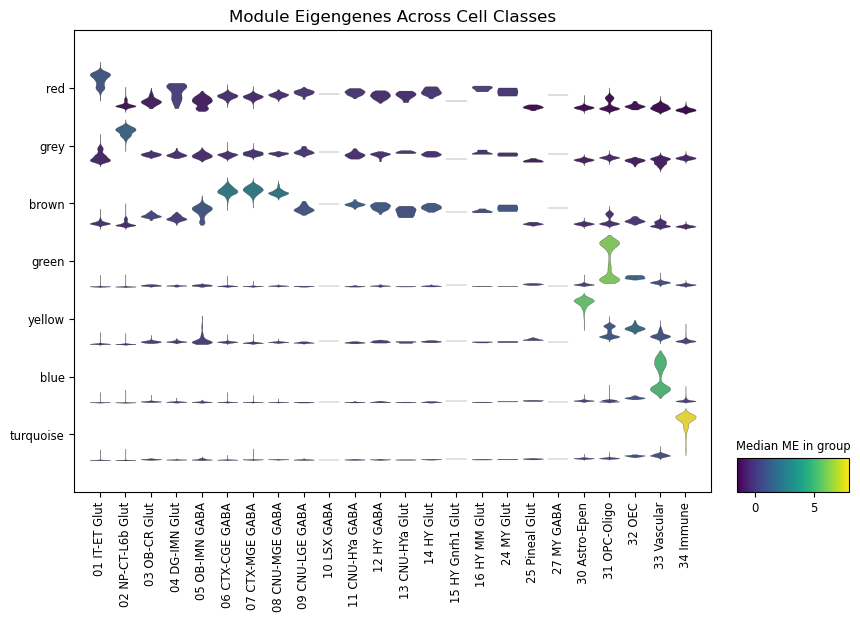

In [17]:
# Plot stacked violins
sc.pl.stacked_violin(
    adata_vis,
    var_names=modules,
    groupby="class",
    swap_axes=True,  # Show modules on y-axis, cell types on x-axis
    figsize=(10, 6),  # Adjust size as needed
    title="Module Eigengenes Across Cell Classes",
    colorbar_title="Median ME in group",
    cmap="viridis",  # Color map
    dendrogram=False,  # Disable clustering for simplicity
    use_raw=False,
)